##Chi-Square Test
The **Chi-Square Test** is a statistical method used to compare the differences between observed and expected data to determine if they are **due to chance** **or if there is a meaningful** relationship or difference. <br>It is commonly used when dealing with categorical data (data that can be divided into groups like "Yes/No," "Male/Female," or "Red/Blue/Green").

In this example, we will analyse **smokers data** to find out if the proportion of smokers significantly differ across different regions

Null hypotheses (H0): Smokers proportions is not significantly different across different regions

We will use chi square statistic and p-value to find out if null hypothesis holds or not. <br><br>
Chi-Square statistic quantifies the difference between observed frequencies (actual data) and expected frequencies (under the null hypothesis of no association).<br>
A larger Chi-Square value indicates a greater deviation between observed and expected frequencies, suggesting a stronger association between the variables.


In [ ]:
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="darkgrid") # set the background for the graphs
from scipy.stats import skew
from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from   scipy.stats import chi2_contingency   # For Chi-Sq

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riyabangera","key":"d5a92cf8021850a75165fe9784b5720b"}'}

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 28.7MB/s]


In [ ]:
!unzip insurance.zip

Archive:  insurance.zip
  inflating: insurance.csv           


In [ ]:
import pandas as pd
df=pd.read_csv("insurance.csv")
insured=df.copy()

Using hypothesis esting to determine if the proportion of smokers significantly differ across different regions?

Step 1: Define null and alternative hypotheses * H0 Smokers proportions is not significantly different across different regions * Ha Smokers proportions is different across different regions

Step 2: Decide the significance level
α = 0.05

Step 3: Identify Test
Here we are comparing two different categorical variables, smoker and different region. So perform a Chi-sq Test.

Step 4: Calculate the test-statistics and p-value

In [ ]:
contigency= pd.crosstab(insured.region, insured.smoker)
contigency

smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58

<Axes: xlabel='region'>

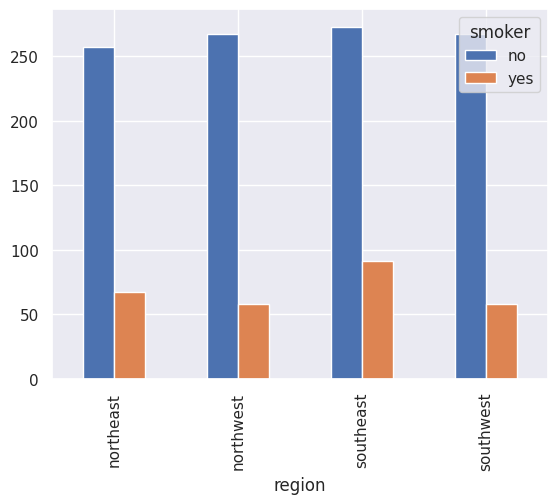

In [ ]:
contigency.plot(kind='bar')

In [ ]:
# Using the chi2_contingency test
chi2, pval, dof, exp_freq = chi2_contingency(contigency, correction = False)
print('chi-square statistic: {} , Pvalue: {} , Degree of freedom: {} ,expected frequencies: {} '.format(chi2, pval, dof, exp_freq))

chi-square statistic: 7.343477761407071 , Pvalue: 0.06171954839170541 , Degree of freedom: 3 ,expected frequencies: [[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]] 


##Interpretation

**Chi-Square Statistic (7.34)**:<br>
The calculated Chi-Square statistic quantifies the difference between observed frequencies (actual data) and expected frequencies (under the null hypothesis of no association).<br>
A larger Chi-Square value indicates a greater deviation between observed and expected frequencies, suggesting a stronger association between the variables.<br>
**P-value (0.0617)**:<br>
The p-value represents the probability of observing the data (or something more extreme) if the null hypothesis is true.
Here, the p-value is 0.0617, which is slightly above the typical significance threshold of 0.05.
<br><br>
**Conclusion:**<br>
P-value (0.0617)

Since the p-value is slightly above the typical significance level of 0.05, we fail to reject the null hypothesis.
This means there is no strong evidence to conclude that region has a significant impact on smoking status. However, the p-value is close to 0.05, suggesting a weak or borderline association that might warrant further investigation with more data or different significance thresholds.
Practical Implications:

While the statistical test doesn't provide strong evidence of an association, this does not rule out the possibility of some real-world effect. Additional analyses, such as looking at effect sizes or patterns in the data, could be helpful for a more nuanced understanding.

In [ ]:
if (pval < 0.05):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Failed to reject Null Hypothesis


Step 5: Decide to reject or accept null hypothesis

We failed to reject the null hypothesis and conclude that Smoker proportions is not significantly different across different regions.